# Assignment - Advanced Regression 

## House Price Prediction 

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.



<b> Steps:
    
- Importing Libraries and loading data
- Data Preparation and Cleaning
    - Handling/dropping missing values
    - Imputing missing values
    - Dropping redundant columns
- Checking correlation
- Label encoding and scaling
- Model Building and Evaluation
- Observations and Insights


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os

import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

## Importing Data

In [2]:
df_house = pd.read_csv("train.csv")
df_house.shape

(1460, 81)

In [3]:
df_house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Handling Missing Values

**Percentage of null values present in the housing data**

In [6]:
round(df_house.isnull().sum()/len(df_house.index)*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

**Count of nulls with percentage**

In [7]:
percent = (df_house.isnull().sum()/len(df_house['GarageType'])).sort_values(ascending=False)
missing = df_house.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([missing, percent], axis=1, keys=['Count', 'Percent'])
missing_data.head(10)

,Count,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


### Dropping columns with >80% missing values

In [8]:
cols_missing = missing_data[missing_data.Percent > 0.8].index
cols_missing

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], dtype='object')

In [9]:
df_house_v1 = df_house.drop (cols_missing, axis=1)
df_house_v1.shape

(1460, 77)

In [10]:
df_house_v1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


**Recheck for Missing Values**

In [11]:
percent = (df_house_v1.isnull().sum()/len(df_house_v1['GarageType'])).sort_values(ascending=False)
count = df_house_v1.isnull().sum().sort_values(ascending=False)
missing_data = pd.concat([count, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageQual,81,0.055479
GarageCond,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtFinType1,37,0.025342


## Imputing Missing Values

In [12]:
df_house_v1['BsmtExposure'].value_counts(dropna=False)/len(df_house_v1['BsmtExposure'])*100

No     65.273973
Av     15.136986
Gd      9.178082
Mn      7.808219
NaN     2.602740
Name: BsmtExposure, dtype: float64

### Replacing 'NA' with Mode (categorical variables)

In [13]:
nulls = [ "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "BsmtCond", "BsmtQual", 
         "GarageType", "GarageFinish", "GarageQual", "GarageCond", "MasVnrType","Electrical"]
for i in nulls:
    df_house_v1[i] = np.where(df_house_v1[i].isnull() , df_house_v1[i].mode(), df_house_v1[i])
    

### Replacing 'NA' with Median (numerical variables)

In [14]:
nulls = [ "GarageYrBlt","MasVnrArea","LotFrontage"]
for i in nulls:
    df_house_v1[i].fillna(df_house_v1[i].median(), inplace=True)

### Replacing 'NA' with None

In [15]:
df_house_v1["FireplaceQu"].value_counts(dropna=False)

NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

In [16]:
nulls = ["FireplaceQu"]
for i in nulls:
    df_house_v1[i].fillna("None", inplace=True)

In [17]:
df_house_v1["FireplaceQu"].value_counts(dropna=False)

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

## Dropping 'ID' Column (Not required)

In [18]:
df_house_v1.drop(['Id'], axis=1, inplace=True)
df_house_v1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

## Checking Correlation 

In [19]:
df_house_v1.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.062996,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


**Plot Heatmap**

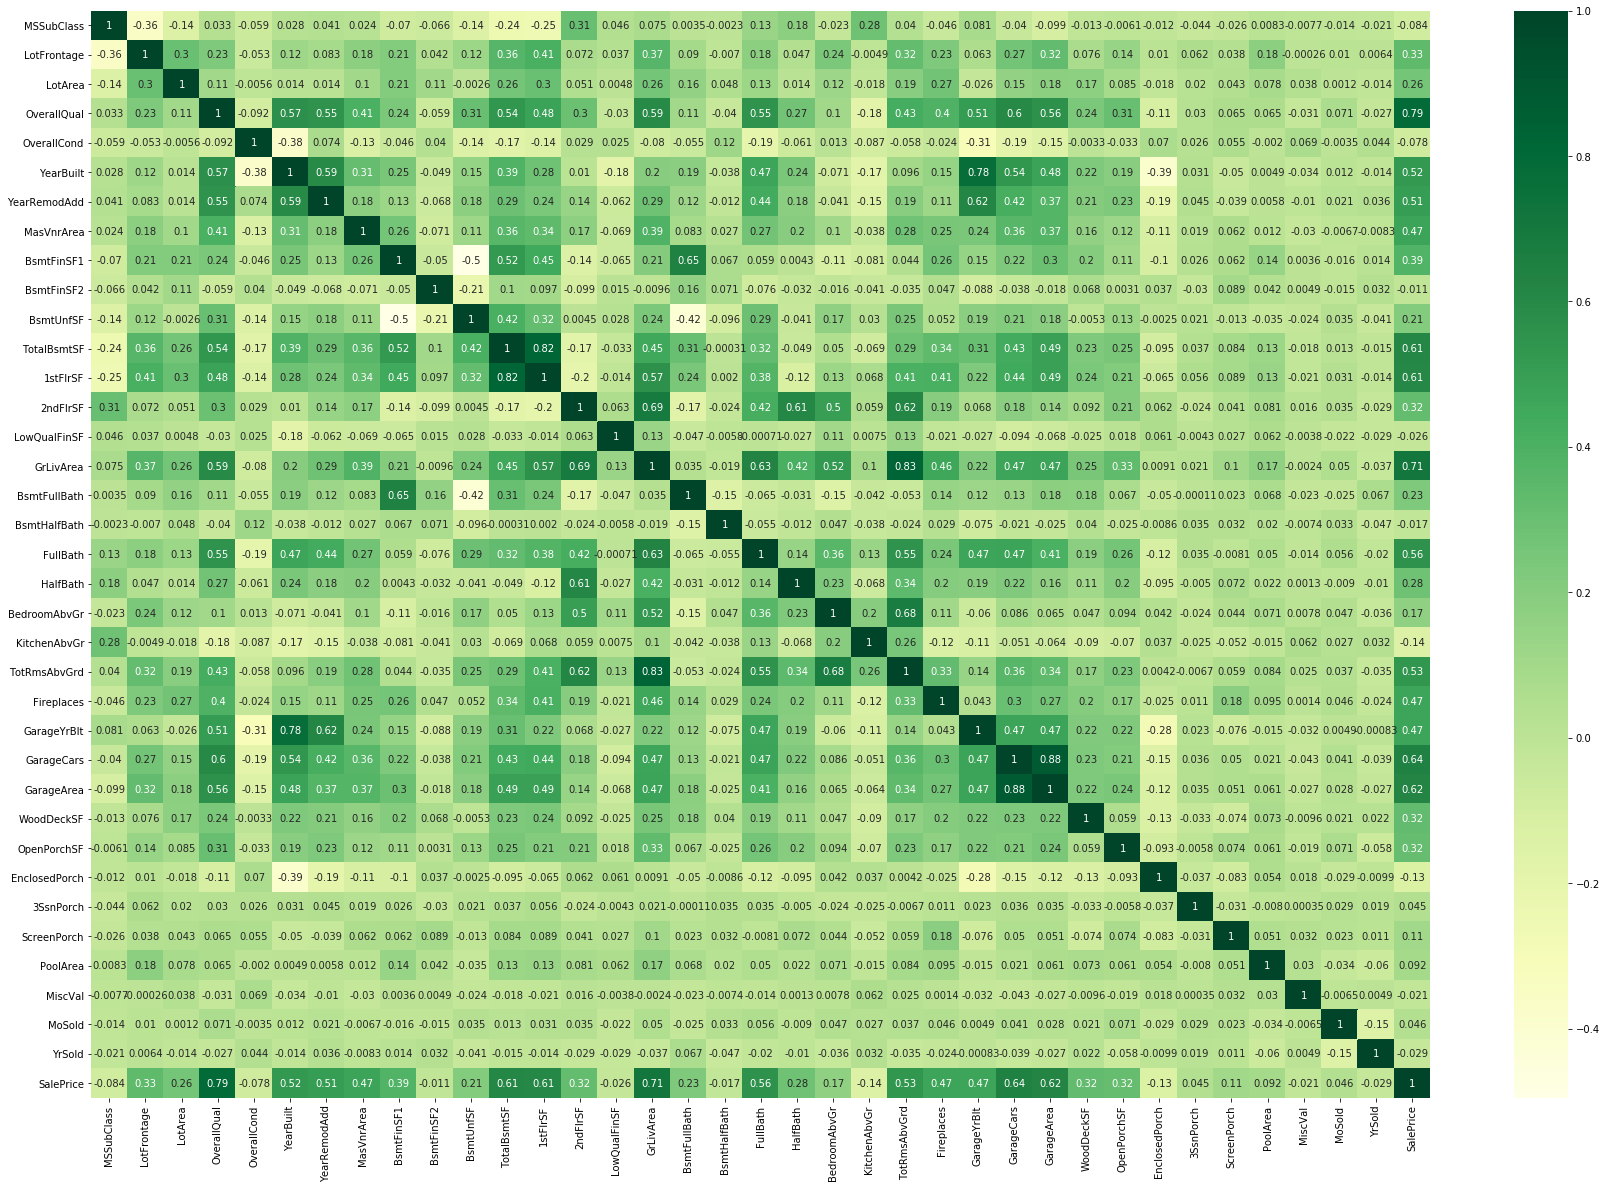

In [20]:
plt.figure(figsize=(30,20))

sns.heatmap(df_house_v1.corr(), cmap="YlGn", annot=True)
plt.show()

- We can see strong correlation between many variables.

- We will now handle **top 10 correlation variables** wrt Target

**Correlation Heatmap for Top 10 correlated Variables**

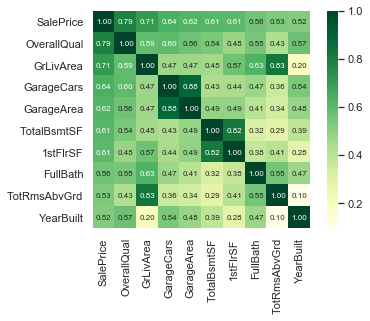

In [21]:
x = 10
col = df_house_v1.corr().nlargest(x, 'SalePrice')['SalePrice'].index
cmp = np.corrcoef(df_house_v1[col].values.T)
sns.set(font_scale=1.0)
plt.figure(figsize=(6,4))
hmp = sns.heatmap(cmp, cbar=True, cmap="YlGn", annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=col.values, xticklabels=col.values)
plt.show()

We can see from the above plot that many variables has a good correlation with the Sales Price

**Pairplot between these 10 variables**

In [22]:
col

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

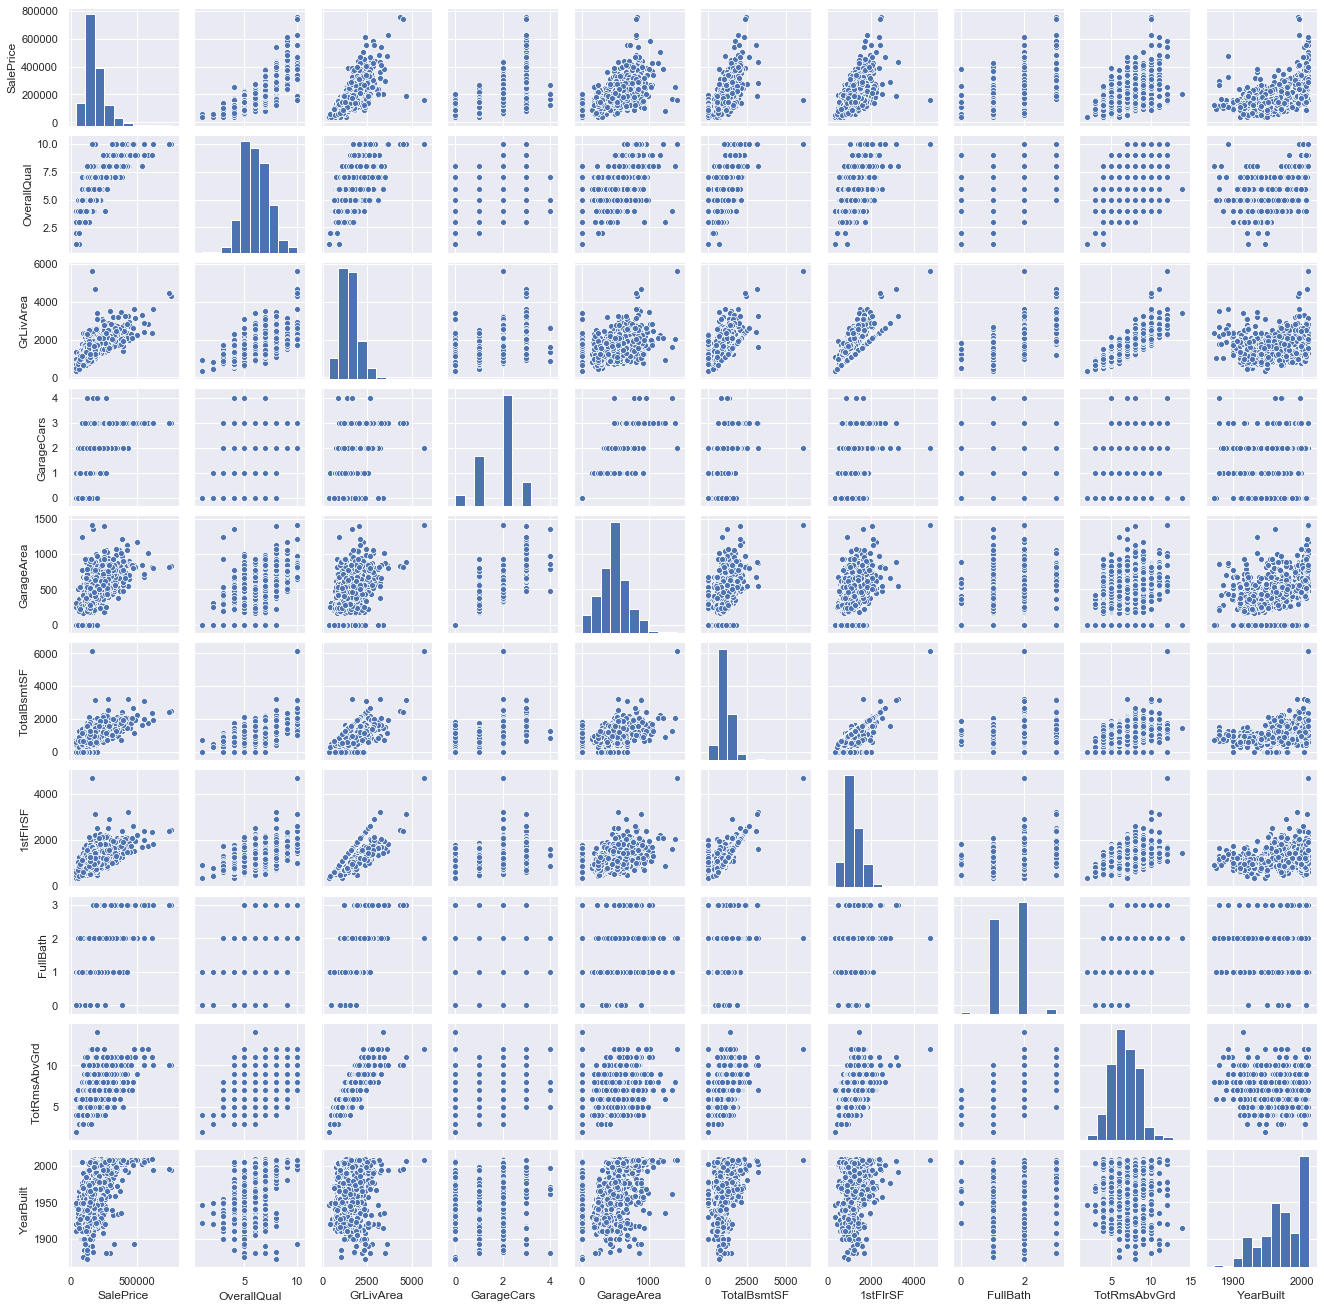

In [23]:
sns.pairplot(df_house_v1[col],height = 1.8)
plt.show()

## Exploring imputed Categorical Variables

In [24]:
df_house_v1['BsmtExposure'].value_counts(dropna=False)/len(df_house_v1['BsmtExposure'])*100

No    67.876712
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

In [25]:
df_house_v1['BsmtFinType1'].value_counts(dropna=False)/len(df_house_v1['BsmtFinType1'])*100

Unf    31.986301
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64

In [26]:
df_house_v1['FireplaceQu'].value_counts(dropna=False)/len(df_house_v1['FireplaceQu'])*100

None    47.260274
Gd      26.027397
TA      21.438356
Fa       2.260274
Ex       1.643836
Po       1.369863
Name: FireplaceQu, dtype: float64

In [27]:
df_house_v1['GarageType'].value_counts(dropna=False)/len(df_house_v1['GarageType'])*100

Attchd     65.136986
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

## Plotting other variables with of Sales Price

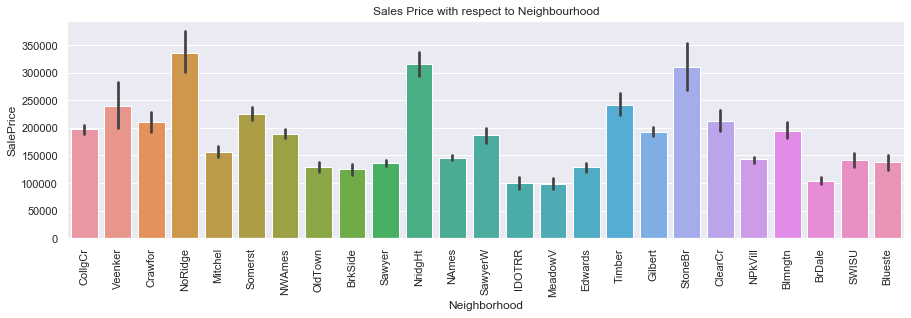

In [28]:
# Plot with Neighbourhood
plt.figure(figsize=(15, 4))
sns.barplot(x="Neighborhood", y="SalePrice", data= df_house_v1)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)
plt.show()

 -   <b> We can see some Neighbourhood has very high prices 

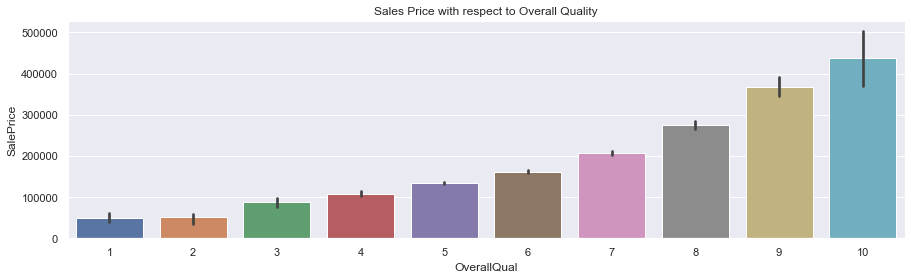

In [29]:
# Plot with Overall quality
plt.figure(figsize=(15, 4))
sns.barplot(x="OverallQual", y="SalePrice", data= df_house_v1)
plt.title("Sales Price with respect to Overall Quality")
plt.show()

-   <b> We can say Sales Prices increase with the Overall Quality

## Exploring Distribution on Dependent Variable

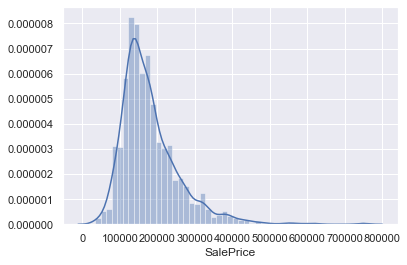

In [30]:
plt.figure(figsize=(6,4))
sns.distplot(df_house_v1['SalePrice'])
plt.show()

-   <b> Sales prices are left Skewed as per the above distribution

## Appling Log Transformation to Sales price to get Normally Distributed target

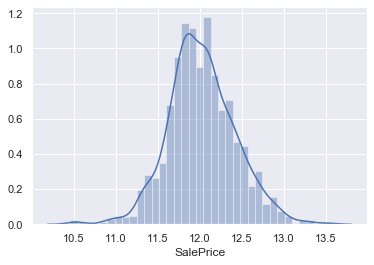

In [31]:
df_house_v1['SalePrice']=np.log1p(df_house_v1['SalePrice'])

plt.figure(figsize=(6,4))
sns.distplot(df_house_v1['SalePrice'])
plt.show()

-   <b> Here we get Normally Distributed House Prices after Log Transformation

## Exploring Numerical Variables

In [32]:
df_house_v1.select_dtypes(include=np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,12.247699
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,12.109016
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,12.317171
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,11.849405
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,12.072547
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,12.254868
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,12.493133
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,11.864469


## Plotting some Numerical Variables with Sales Price using Scatter Plot

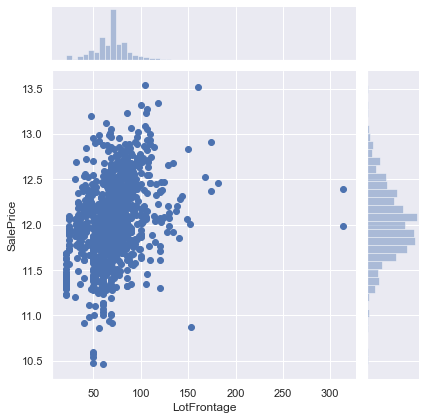

In [33]:
sns.jointplot(x = df_house_v1['LotFrontage'], y = df_house_v1['SalePrice'])
plt.show()

- <b> We can see Lot Frontage has some Outliers in the data

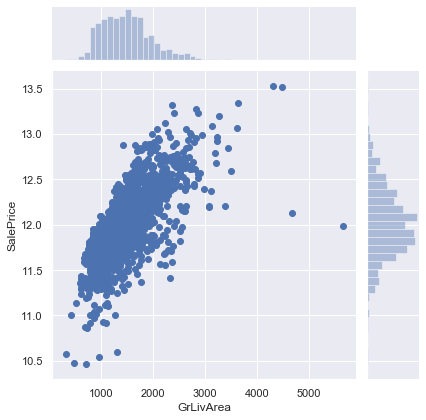

In [34]:
sns.jointplot(x=df_house_v1['GrLivArea'], y=df_house_v1['SalePrice'])
plt.show()

-   <b> For GrLivArea, we see a positive linear relation with the Sales Price

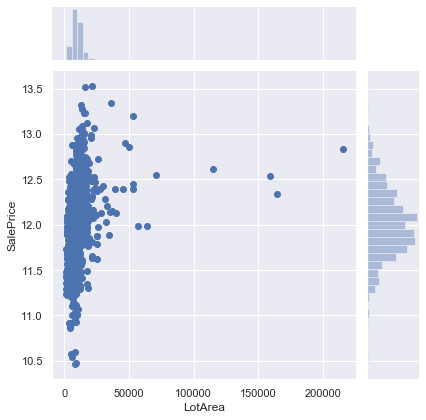

In [35]:
sns.jointplot(x = df_house_v1['LotArea'], y = df_house_v1['SalePrice'])
plt.show()

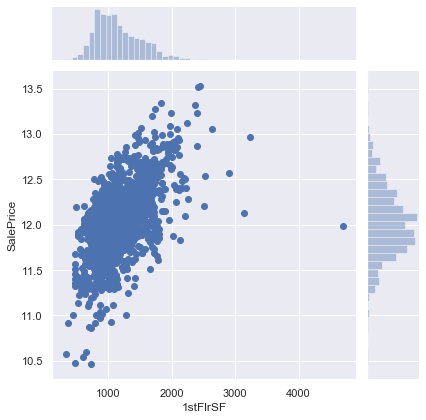

In [36]:
sns.jointplot(x = df_house_v1['1stFlrSF'], y = df_house_v1['SalePrice'])
plt.show()

-   <b> A slight positive relation can be observed between 1stFlrSF and Sales Price*

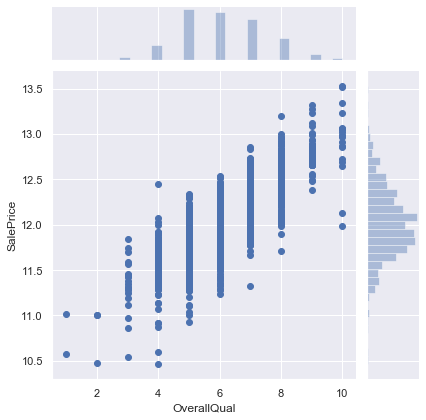

In [37]:
sns.jointplot(x = df_house_v1['OverallQual'], y = df_house_v1['SalePrice'])
plt.show()

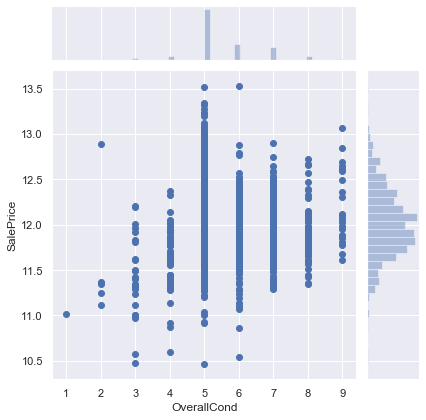

In [38]:
sns.jointplot(x=df_house_v1['OverallCond'], y = df_house_v1['SalePrice'])
plt.show()

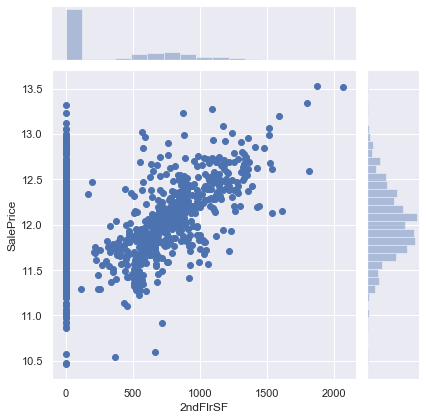

In [39]:
sns.jointplot(x = df_house_v1['2ndFlrSF'], y = df_house_v1['SalePrice'])
plt.show()

<b> We can conclude from the scatter plots that below features have good relation (positive and Linear) with target

*  GrLivArea
*  2ndFlrSF
*  1stFlrSF

In [40]:
df_house_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Creating new feature (derived feature)

In [41]:
# calculating the age of the property
df_house_v1['Property_Age'] = (df_house_v1['YrSold'] - df_house_v1['YearBuilt'])
df_house_v1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Property_Age
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,12.247699,5
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,12.109016,31
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,12.317171,7
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,11.849405,91
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,12.429220,8


- *Ploting Property Age with Sales Price*

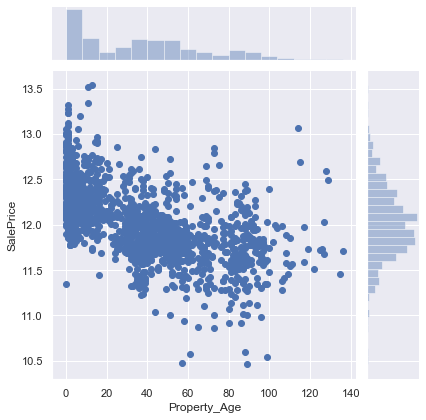

In [42]:
sns.jointplot(x = df_house_v1['Property_Age'], y = df_house_v1['SalePrice'])
plt.show()

## Dropping Redundant Columns

In [43]:
df_house_v2 = df_house_v1.drop(['MoSold','YrSold','YearBuilt','YearRemodAdd'], axis = 1)
df_house_v2.shape


(1460, 73)

In [214]:
# df_house_v2 = df_house_v2[~((df_house_v2['Exterior2nd']=='Other')|(df_house_v2['Exterior2nd']=='CBlock'))]
# df_house_v2.shape,df_house_v1.shape

## Data Preparation 

**Understanding Datatypes of current DF**

In [44]:
types = df_house_v2.dtypes

#numerical values 
numeric_type = types[(types == 'int64') | (types == 'float64')] 

pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     39
int64      30
float64     4
Name: 0, dtype: int64

## Defining Predictors and Target Variable

In [45]:
X = df_house_v2.drop(['SalePrice'], axis=1)
y = df_house_v2['SalePrice']

X.shape

(1460, 72)

In [46]:
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

## Segregating Categorical Varibales

In [47]:
categorical_columns = X.select_dtypes(include=['category', 'object']).columns.tolist()
print(categorical_columns)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


## Segregating Numerical Varibales

In [48]:
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'Property_Age']


## Label Encoding

- <b> We have a lot of categorical variables, hence Manual Selection for creating dummy is not recommended. Thus we are performing Label Encodimg for each categorical feature

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i,col in enumerate(categorical_columns):
    col = LabelEncoder()
    print(categorical_columns[i])
    X[categorical_columns[i]] = col.fit_transform(X[categorical_columns[i]])

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


### **Splitting Data into Training and Test Set**

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### **Applying Standardization to Variables**

In [51]:
from sklearn.preprocessing import StandardScaler


In [52]:
scaler = StandardScaler()

X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])

X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])


In [53]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,Property_Age
210,-0.657071,3,-0.115302,-0.473765,1,3,3,0,4,0,7,2,2,0,2,-0.779861,0.383154,1,1,11,12,2,-0.558025,3,4,1,3,3,3,4,0.043512,5,-0.293313,-0.374367,-0.430911,1,4,0,0,-0.765065,-0.787597,-0.124502,-1.228053,1.066863,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,3,-0.935650,6,-0.925422,3,1,0.048537,2,-2.366798,-2.217786,4,4,2,-0.743160,-0.709347,1.150231,-0.121922,-0.275126,-0.062302,-0.084263,8,4,1.529604
318,0.035976,3,0.926898,-0.056845,1,3,2,0,4,1,15,2,2,0,5,0.649651,-0.533005,1,1,6,6,1,0.809137,2,4,2,2,3,1,2,1.160345,5,-0.293313,-0.454644,0.621579,1,0,1,4,0.511914,2.140556,-0.124502,2.123103,1.066863,-0.247791,0.786428,1.246998,1.396261,-0.234155,2,1.556976,6,0.623522,5,1,0.591737,1,1.645101,0.867506,4,4,2,1.989482,0.197980,1.910043,-0.121922,-0.275126,-0.062302,-0.084263,8,4,-0.677573
239,-0.195040,3,-0.794998,-0.169324,1,3,3,0,4,0,7,2,2,0,0,-0.065105,-1.449164,1,1,12,13,2,-0.558025,3,4,1,3,0,3,3,-0.761296,5,-0.293313,0.171964,-0.712011,1,4,1,0,-0.930972,0.795996,-0.124502,-0.056465,-0.837450,-0.247791,-1.026085,1.246998,0.176772,-0.234155,3,0.310663,6,0.623522,2,5,-1.246786,2,-1.029498,-1.183084,4,4,2,-0.743160,1.407748,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,8,4,0.936631
986,-0.195040,4,-0.477806,-0.502297,1,3,3,0,0,0,17,1,2,0,0,-0.065105,2.215472,3,1,12,13,2,-0.558025,3,2,1,3,0,3,5,-0.963574,5,-0.293313,-0.175904,-1.256778,1,2,1,4,-0.420683,0.669584,-0.124502,0.221858,-0.837450,-0.247791,-1.026085,-0.751723,-1.042717,-0.234155,2,-0.935650,6,-0.925422,3,1,-1.205001,2,-1.029498,-1.018473,1,4,2,2.423490,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,8,4,1.957862
1416,3.039179,4,-0.432493,0.082905,1,3,3,0,4,0,17,2,2,1,5,-1.494617,0.383154,1,1,12,0,2,-0.558025,3,4,2,3,3,3,5,-0.963574,5,-0.293313,0.475233,-0.620490,1,2,1,4,0.195183,1.611926,-0.124502,1.453624,-0.837450,-0.247791,0.786428,-0.751723,1.396261,4.112612,3,2.803289,6,-0.925422,3,5,-0.327524,2,0.307802,0.416000,4,4,0,-0.743160,-0.709347,1.435160,-0.121922,-0.275126,-0.062302,-0.084263,8,4,2.913207


In [54]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SaleType,SaleCondition,Property_Age
1436,-0.888086,3,-0.432493,-0.144189,1,3,3,0,2,0,12,2,2,0,2,-1.494617,0.383154,1,1,6,6,2,-0.558025,3,4,2,3,3,3,0,0.361992,5,-0.293313,-0.704396,-0.430911,1,4,1,4,-0.765065,-0.787597,-0.124502,-1.228053,-0.837450,-0.247791,-1.026085,-0.751723,0.176772,-0.234155,3,-0.935650,6,-0.925422,3,5,-0.202170,2,0.307802,0.265498,4,4,2,-0.743160,-0.709347,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,8,4,-0.018714
57,0.035976,3,0.881585,0.112505,1,0,3,0,0,0,5,2,2,0,5,0.649651,-0.533005,1,1,12,13,2,-0.558025,2,4,2,2,3,3,5,-0.963574,5,-0.293313,0.660317,-0.439628,1,0,1,4,-0.775120,1.189021,-0.124502,0.381706,-0.837450,-0.247791,0.786428,1.246998,0.176772,-0.234155,2,0.310663,6,-0.925422,3,1,1.051368,1,0.307802,0.439515,4,4,2,-0.743160,0.349201,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,8,4,-1.138774
780,-0.888086,3,-0.296554,-0.253368,1,3,3,0,4,0,8,2,2,0,2,0.649651,-0.533005,1,1,6,6,1,-0.355087,3,4,2,2,1,3,5,-0.963574,5,-0.293313,1.500998,0.381881,1,2,1,4,0.212779,-0.787597,-0.124502,-0.496515,-0.837450,-0.247791,0.786428,-0.751723,0.176772,-0.234155,3,-0.312494,6,0.623522,5,1,0.675307,0,0.307802,-0.327104,4,4,2,1.025020,-0.391783,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,8,4,-0.809344
382,0.035976,3,0.428455,-0.120412,1,0,3,0,4,0,5,2,2,0,5,0.649651,-0.533005,1,1,12,13,2,-0.558025,2,4,2,2,3,0,5,-0.963574,5,-0.293313,0.836481,-0.267481,1,0,1,4,-0.576535,1.184425,-0.124502,0.526509,-0.837450,-0.247791,0.786428,1.246998,0.176772,-0.234155,2,0.933819,6,-0.925422,3,1,1.134937,1,0.307802,0.787551,4,4,2,0.414194,0.092125,-0.369395,-0.121922,-0.275126,-0.062302,-0.084263,8,4,-1.171717
1170,0.498007,3,0.292515,-0.058786,1,3,3,0,4,0,11,2,2,0,7,-0.065105,0.383154,1,1,9,10,2,-0.558025,3,4,1,3,3,0,0,0.159714,5,-0.293313,0.022559,0.074633,1,4,1,4,-0.126576,-0.787597,-0.124502,-0.750391,1.066863,-0.247791,-1.026085,-0.751723,0.176772,-0.234155,3,-0.312494,6,0.623522,4,1,-0.076817,0,-1.029498,-0.534044,4,4,2,0.888388,-0.709347,-0.369395,-0.121922,-0.275126,16.629857,-0.084263,8,4,-0.183429


## Linear Regression

**Model Building And Evaluation**

In [55]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

**Building Linear Model**

In [56]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Predicting**

In [57]:
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.849385521139074

In [58]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

0.8310582423230078

-   **Here we see Training dataset has a R2 score of ~85%, which is good. However the Model score on the test set with a little low R2 Score i.e. 83%**

-   **This suggests the model is Overfit. Need to try regularisation**

## Lasso Regularization

**Define some alpha values for tuning**

In [59]:
parameters = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 5.0, 10.0, 20, 50, 100 ]}
lasso = Lasso()

**Using Cross validation**

In [60]:
# 5 Fold CV
k_folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = parameters, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = k_folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 


Fitting 5 folds for each of 21 candidates, totalling 105 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 105 out of 105 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   5.0, 10.0, 20, 50, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

### Best value of alpha for Lasso

In [61]:
print(model_cv.best_params_)

{'alpha': 0.001}


In [62]:
output = pd.DataFrame(model_cv.cv_results_)
cv_result = output[output['param_alpha']<=1]
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.070786,0.012318,0.004729,0.006271,0.0001,{'alpha': 0.0001},-0.104455,-0.100691,-0.109358,-0.089081,-0.092922,-0.099301,0.007413,2,-0.091957,-0.082070,-0.087386,-0.094178,-0.092328,-0.089584,0.004372
1,0.015627,0.000013,0.000000,0.000000,0.001,{'alpha': 0.001},-0.102070,-0.102111,-0.105543,-0.088919,-0.092305,-0.098190,0.006404,1,-0.091944,-0.081936,-0.087164,-0.093445,-0.092304,-0.089359,0.004289
2,0.006250,0.007655,0.000000,0.000000,0.01,{'alpha': 0.01},-0.095994,-0.106186,-0.101595,-0.093143,-0.100292,-0.099442,0.004526,3,-0.097427,-0.085930,-0.093327,-0.098357,-0.098892,-0.094787,0.004840
3,0.003125,0.006250,0.000000,0.000000,0.05,{'alpha': 0.05},-0.116336,-0.129878,-0.125355,-0.123923,-0.126172,-0.124333,0.004456,4,-0.126129,-0.114488,-0.121036,-0.124468,-0.127309,-0.122686,0.004612
4,0.003121,0.006241,0.006250,0.007655,0.1,{'alpha': 0.1},-0.152593,-0.167667,-0.158399,-0.153906,-0.164651,-0.159443,0.005889,5,-0.159150,-0.153430,-0.156723,-0.156374,-0.161710,-0.157478,0.002788


**Plot mean test and train scores with respect to alpha values**

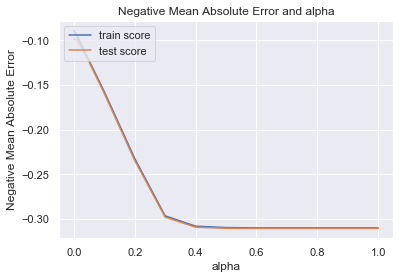

In [63]:
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')

plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()

-   **Here, the Negative Mean Absolute Error Value is negligible after alpha=0.2**

- <b> Bias_variance Tradeoff should also be considered while selecting the alpha value

### Building Model on different values of alpha

#### <b> 1. For alpha = 0.2

In [64]:
alpha = 0.2
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
# lasso.coef_

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [65]:
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [x for x in model_params]
col = X.columns
col = col.insert(0, "constant")
list(zip(col, model_params))

[('constant', 11.978207823536652),
 ('MSSubClass', -0.0),
 ('MSZoning', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('LotShape', -0.0),
 ('LandContour', 0.0),
 ('Utilities', -0.0),
 ('LotConfig', -0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.004542270262313629),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', -0.0),
 ('HouseStyle', 0.0),
 ('OverallQual', 0.10999601735433673),
 ('OverallCond', -0.0),
 ('RoofStyle', 0.0),
 ('RoofMatl', 0.0),
 ('Exterior1st', 0.0),
 ('Exterior2nd', 0.0),
 ('MasVnrType', -0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', -0.0),
 ('ExterCond', 0.0),
 ('Foundation', 0.0),
 ('BsmtQual', -0.0),
 ('BsmtCond', 0.0),
 ('BsmtExposure', -0.0),
 ('BsmtFinType1', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.0),
 ('Heating', -0.0),
 ('HeatingQC', -0.007772506124639622),
 ('CentralAir', 0.0),
 ('Electrical', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF',

-   **Since Most Coeff are 0, let's select a lower alpha value**

#### <b> 2. For alpha = 0.1

In [66]:
alpha = 0.1
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
# lasso.coef_

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [67]:
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [x for x in model_params]
col = X.columns
col = col.insert(0, "constant")
list(zip(col, model_params))

[('constant', 12.045936089397202),
 ('MSSubClass', -0.0),
 ('MSZoning', -0.0),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('Street', 0.0),
 ('LotShape', -0.0),
 ('LandContour', 0.0),
 ('Utilities', -0.0),
 ('LotConfig', -0.0),
 ('LandSlope', 0.0),
 ('Neighborhood', 0.002841269163576535),
 ('Condition1', 0.0),
 ('Condition2', 0.0),
 ('BldgType', -0.0),
 ('HouseStyle', 0.0),
 ('OverallQual', 0.13978543317543035),
 ('OverallCond', 0.0),
 ('RoofStyle', 0.0),
 ('RoofMatl', 0.0),
 ('Exterior1st', 0.0),
 ('Exterior2nd', 0.0),
 ('MasVnrType', -0.0),
 ('MasVnrArea', 0.0),
 ('ExterQual', -0.0),
 ('ExterCond', 0.0),
 ('Foundation', 0.0),
 ('BsmtQual', -0.0),
 ('BsmtCond', 0.0),
 ('BsmtExposure', -0.0),
 ('BsmtFinType1', -0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.006381206004137848),
 ('Heating', -0.0),
 ('HeatingQC', -0.015239149936105463),
 ('CentralAir', 0.0),
 ('Electrical', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.0),
 

-   **Selecting a lower alpha again due to many Coeff. values being zero**

### <b> 3. For alpha = 0.01 (Best Parameter)

In [68]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
# lasso.coef_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [x for x in model_params]
col = X.columns
col = col.insert(0, "constant")
# list(zip(col, model_params))

**Model Parameters**

In [70]:
params_lasso = pd.DataFrame(list(zip(col, model_params)))
params_lasso.columns = ['Variable', 'Coeff']
params_lasso.sort_values(by=['Coeff'], ascending = False).head(15)

,Variable,Coeff
0,constant,12.090585
16,OverallQual,0.117576
43,GrLivArea,0.101515
58,GarageCars,0.048405
17,OverallCond,0.033981
53,Fireplaces,0.024369
44,BsmtFullBath,0.021597
35,TotalBsmtSF,0.015005
71,SaleCondition,0.011124
4,LotArea,0.010264


**Selecting alpha=0.01 and Creating a Model**

In [71]:
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

**Prediction on the test dataset**

In [72]:
y_train_pred = lm.predict(X_train)
print("R2Score Train at Lasso 0.01 : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("R2Score Test at Lasso 0.01 : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

R2Score Train at Lasso 0.01 :  0.8682110792352504
R2Score Test at Lasso 0.01 :  0.8618230378863683


-   **Here, the R2 Score for training and test set are above 86%, which demotes a good Model**

**Let's check Mean Squared Error and Root Mean Squared Error**

In [73]:
print("MSE at Lasso 0.01 : ",metrics.mean_squared_error(y_test, y_test_pred))

MSE at Lasso 0.01 :  0.02273534959524516


In [74]:
print("RMSE at Lasso 0.01 : ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE at Lasso 0.01 :  0.15078245784986116


#### <b> 4. For alpha = 0.02 (Double value)

In [75]:
lm = Lasso(alpha=0.02)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
print("After doubling alpha i.e at 0.02 :")
print("R2Score Train : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("R2Score Test : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print("MSE : ",metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

After doubling alpha i.e at 0.02 :
R2Score Train :  0.8492388809789624
R2Score Test :  0.8440647680447696
MSE :  0.02565725833371795
RMSE :  0.16017883235221173


#### <b> 5. For alpha = 0.01 (After removing Top5 features)

In [76]:
X_train_v1  = X_train.drop(columns=['OverallQual','GrLivArea','GarageCars','OverallCond','Fireplaces'])
X_train_v1.shape

(1021, 67)

In [77]:
X_test_v1  = X_test.drop(columns=['OverallQual','GrLivArea','GarageCars','OverallCond','Fireplaces'])
X_test_v1.shape

(438, 67)

In [78]:
alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train_v1, y_train)
# lasso.coef_

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [79]:
model_params = list(lasso.coef_ )
model_params.insert(0, lasso.intercept_)
model_params = [x for x in model_params]
col = X.columns
col = col.insert(0, "constant")
# list(zip(col, model_params))

**Model Parameters**

In [80]:
params_lasso_v1 = pd.DataFrame(list(zip(col, model_params)))
params_lasso_v1.columns = ['Variable', 'Coeff']
params_lasso_v1.sort_values(by=['Coeff'], ascending = False).head(15)

,Variable,Coeff
0,constant,12.039272
38,CentralAir,0.096087
39,Electrical,0.083650
54,FireplaceQu,0.059434
48,BedroomAbvGr,0.033415
33,BsmtFinSF2,0.027570
43,GrLivArea,0.025517
49,KitchenAbvGr,0.019087
37,HeatingQC,0.015455
58,GarageCars,0.015424


## Ridge Regularization

In [81]:
parameters = {'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0, 5.0, 10.0, 20, 50, 100, 200 ]}
ridge = Ridge()

**Cross Validation**

In [82]:
# 5 Fold CV
k_folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = parameters, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = k_folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 13 candidates, totalling 65 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  65 out of  65 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.05, 0.1, 0.2, 0.5, 1.0, 5.0,
                                   10.0, 20, 50, 100, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

### Best value of alpha for Ridge

In [83]:
print(model_cv.best_params_)

{'alpha': 100}


In [84]:
output = pd.DataFrame(model_cv.cv_results_)
cv_result = output[output['param_alpha']<=200]
cv_result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.027215,0.038405,0.000000,0.000000,0.001,{'alpha': 0.001},-0.104665,-0.100502,-0.110152,-0.089194,-0.093249,-0.099553,0.007569,13,-0.091920,-0.082012,-0.087393,-0.094208,-0.092401,-0.089587,0.004403
1,0.000000,0.000000,0.003125,0.006251,0.01,{'alpha': 0.01},-0.104663,-0.100507,-0.110150,-0.089195,-0.093236,-0.099550,0.007570,12,-0.091921,-0.082013,-0.087394,-0.094209,-0.092402,-0.089588,0.004403
2,0.006254,0.007660,0.000000,0.000000,0.05,{'alpha': 0.05},-0.104652,-0.100527,-0.110140,-0.089202,-0.093180,-0.099540,0.007573,11,-0.091926,-0.082018,-0.087397,-0.094213,-0.092405,-0.089592,0.004402
3,0.004801,0.003920,0.004883,0.006450,0.1,{'alpha': 0.1},-0.104638,-0.100552,-0.110127,-0.089210,-0.093112,-0.099528,0.007578,10,-0.091931,-0.082023,-0.087401,-0.094218,-0.092408,-0.089596,0.004402
4,0.009581,0.003213,0.000000,0.000000,0.2,{'alpha': 0.2},-0.104611,-0.100599,-0.110100,-0.089227,-0.092986,-0.099505,0.007585,9,-0.091940,-0.082033,-0.087406,-0.094224,-0.092414,-0.089603,0.004401


**Plot mean test and train scores with respect to alpha**

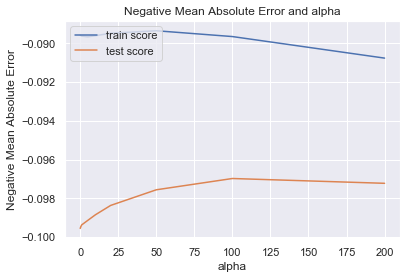

In [85]:
cv_result['param_alpha'] = cv_result['param_alpha'].astype('float32')

plt.plot(cv_result['param_alpha'], cv_result['mean_train_score'])
plt.plot(cv_result['param_alpha'], cv_result['mean_test_score'])

plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.show()

#### <b> 1. For alpha = 1.0

In [86]:
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01757593, -0.01786902, -0.007767  ,  0.0122561 ,  0.17130243,
       -0.00540419,  0.02176043, -0.06136475,  0.00024028,  0.06299908,
        0.0017517 ,  0.00286718, -0.04085221, -0.0049145 , -0.00617744,
        0.10119374,  0.04774255,  0.00452241,  0.01504036,  0.0010532 ,
        0.00050579, -0.00590572,  0.00019653,  0.00950829,  0.00619122,
        0.01878868, -0.02698   ,  0.00545444, -0.01021652, -0.01141098,
        0.00020908,  0.01013635,  0.01174073,  0.00849293,  0.01287977,
        0.00181986, -0.00934395,  0.0565447 ,  0.00492791,  0.03675439,
        0.03311979,  0.00703197,  0.05523242,  0.03653355,  0.00463756,
        0.02236181,  0.00741677,  0.01079751, -0.00953798, -0.0240354 ,
        0.01928856,  0.0133922 ,  0.02358081, -0.0080417 , -0.00825112,
       -0.01071407, -0.01293185,  0.04382267,  0.0062494 ,  0.00431038,
        0.00981475,  0.01304879,  0.01197053, -0.00349529,  0.00826308,
        0.00644692,  0.01163759, -0.02122635, -0.00054408,  0.00

#### <b> 2. For alpha = 10

In [87]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01791651, -0.01690319, -0.00799404,  0.01147728,  0.05580459,
       -0.00567052,  0.02134802, -0.01066796,  0.00042548,  0.05147456,
        0.00169882,  0.00178029, -0.03613291, -0.0050543 , -0.00602422,
        0.09951041,  0.04729231,  0.00447389,  0.01626627,  0.00085158,
        0.00057908, -0.00505866,  0.00062981,  0.01014242,  0.00674515,
        0.01965908, -0.02724845,  0.00514395, -0.01015978, -0.01146904,
        0.00131268,  0.01017791,  0.01160104,  0.00881007,  0.01425523,
        0.00097985, -0.00981437,  0.05076298,  0.00584948,  0.03566199,
        0.03257898,  0.00696262,  0.0539664 ,  0.03563601,  0.00454742,
        0.0234134 ,  0.00873731,  0.01042443, -0.00972699, -0.02390668,
        0.01988201,  0.01299156,  0.02436852, -0.00781084, -0.00846813,
       -0.00888424, -0.01319804,  0.04251918,  0.00799451,  0.00427297,
        0.00957667,  0.01470467,  0.01191334, -0.00346047,  0.00798884,
        0.00649056,  0.011469  , -0.02098925, -0.00089141,  0.00

### <b> 3. For alpha = 100 (Best Parameter)

In [88]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01496991, -0.01244141, -0.00671088,  0.01302826,  0.00768414,
       -0.00646522,  0.01557833, -0.00117176,  0.00017557,  0.0199726 ,
        0.00183116,  0.00135247, -0.01579097, -0.00515593, -0.00472817,
        0.08588339,  0.04180458,  0.00406693,  0.01646709,  0.00027396,
        0.00122067, -0.00315696,  0.00316405,  0.0010217 ,  0.00747933,
        0.01948066, -0.02591586,  0.00569146, -0.01057089, -0.01151194,
        0.00546411,  0.00660058,  0.00918563,  0.00923523,  0.01797576,
       -0.00325309, -0.01178053,  0.02498461,  0.00839922,  0.03093324,
        0.0278285 ,  0.00488735,  0.04635386,  0.03026196,  0.00428884,
        0.02694255,  0.01269685,  0.01027597, -0.01290884, -0.02223351,
        0.02301886,  0.0128413 ,  0.02687496, -0.00720934, -0.00975415,
       -0.00190167, -0.01503655,  0.03684849,  0.01647076,  0.00389207,
        0.00914339,  0.01692597,  0.01261326, -0.00298906,  0.00534608,
        0.0061175 ,  0.01135119, -0.01865167, -0.00175663,  0.00

**Model Parameters**

In [89]:
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
# list(zip(cols, model_parameters))

In [90]:
params = pd.DataFrame(list(zip(cols, model_parameters)))
params.columns = ['Variable', 'Coeff']
params.sort_values(by=['Coeff'], ascending = False).head(15)

,Variable,Coeff
0,constant,11.869
16,OverallQual,0.086
43,GrLivArea,0.046
17,OverallCond,0.042
58,GarageCars,0.037
40,1stFlrSF,0.031
44,BsmtFullBath,0.030
41,2ndFlrSF,0.028
46,FullBath,0.027
53,Fireplaces,0.027


In [91]:
params = pd.DataFrame(list(zip(cols, model_parameters)))
params.columns = ['Variable', 'Coeff']
params.sort_values(by=['Coeff'], ascending = True).head(15)

,Variable,Coeff
72,Property_Age,-0.041
27,BsmtQual,-0.026
50,KitchenQual,-0.022
68,PoolArea,-0.019
13,Condition2,-0.016
1,MSSubClass,-0.015
57,GarageFinish,-0.015
49,KitchenAbvGr,-0.013
2,MSZoning,-0.012
30,BsmtFinType1,-0.012


**Fitting Ridge Model with alpha= 100**

In [92]:
lm = Ridge(alpha=100)
lm.fit(X_train, y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

**Making Prediction and Evaluating Rsquare metric**

In [93]:
y_train_pred = lm.predict(X_train)
print("R2Score Train at Ridge 100 : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("R2Score Test at Ridge 100 : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

R2Score Train at Ridge 100 :  0.8827145134561905
R2Score Test at Ridge 100 :  0.8672863075656216


**Let's Check MSE and RMSE**

In [94]:
print("MSE at Ridge 100 : ",metrics.mean_squared_error(y_test, y_test_pred))

MSE at Ridge 100 :  0.021836434579377444


In [95]:
print("RMSE at Ridge 100 : ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE at Ridge 100 :  0.14777156214704318


#### <b> 4. For alpha = 200 (Double value)

In [96]:
lm = Ridge(alpha=200)
lm.fit(X_train, y_train)
y_train_pred = lm.predict(X_train)
print("After doubling alpha i.e at 200 :")
print("R2Score Train : ",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print("R2Score Test : ",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print("MSE : ",metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

After doubling alpha i.e at 200 :
R2Score Train :  0.8787921957110507
R2Score Test :  0.8640579394005791
MSE :  0.022367623554237395
RMSE :  0.14955809424513739


In [97]:
model_parameters1 = list(lm.coef_)
model_parameters1 = [round(x, 3) for x in model_parameters1]
model_parameters1.insert(0, lm.intercept_)
cols = X.columns
cols = cols.insert(0, "constant")



In [98]:
params1 = pd.DataFrame(list(zip(cols, model_parameters1)))
params1.columns = ['Variable', 'Coeff']
params1.sort_values(by=['Coeff'], ascending = False).head(25)

,Variable,Coeff
0,constant,11.891575
16,OverallQual,0.076000
43,GrLivArea,0.043000
17,OverallCond,0.037000
58,GarageCars,0.034000
40,1stFlrSF,0.029000
53,Fireplaces,0.028000
46,FullBath,0.027000
44,BsmtFullBath,0.026000
41,2ndFlrSF,0.025000


**Ridge regression performs better than Lasso**
-   Train and Test Rsquare Scores are better than Lasso Regression
-   RMSE is also in exceptable Range (i.e very low) 

### Insights

-   Ridge regression performs better than lasso with better R score Metric for Train and Test Data.
-   Also, RMSE and MSE for Ridge regression is less than lasso.
-   The Ridge model has too many dependent variables.
-   Ridge has many variables with non-zero coeff. making it difficult to select Predicting Variables. 

-   Lasso Regression can be used to get Predicting Variables in the Model

-   Higher Values of Coefficient indicates high value of House Sale Price
-   Negetive Coeff. has inverse relation with House Sale Price
-   Market Value with a lower Price than Predicted Value is a Buy Signal for the Company

<b> As per Ridge at alpha = 100, coefficients : </b> 
1. OverallQual	= 0.086
2. GrLivArea	= 0.046
3. OverallCond	= 0.042
4. GarageCars	= 0.037  
5. 1stFlrSF	    = 0.031 


**Some of the Variables that helps in Predicting Sales Price are:**

    1. OverallQual	: Rates the overall material and finish of the house
    2. GrLivArea	: Above grade (ground) living area square feet
    3. OverallCond	: Rates the overall condition of the house
    4. GarageCars	: Size of garage in car capacity
    5. 1stFlrSF	    : First Floor square feet

